# Analýza datasetu SEMEION 
SEMEION (Semeion Research Center of Sciences of Communication) je dataset obsahujúci ručne písané číslice. Je využívaný pri trénovaní obraz-spracujúcich systémov, pričom jadrom tohto využitia je strojové učenie. Jeho autorom je talianská spoločnosť Tattile S.r.l..
#### <span style="color: blue;">Štruktúra:</span>
Dataset je tvorený 1 593 vzorkami rukou písaných číslic.
#### <span style="color: blue;">Formát vzorky:</span>
Vzorky číslic datasetu majú veľkosť 16x16 pixelov a farebný formát grayscale, teda každý pixel vzorky obsahuje hodnotu reprezentujúcu minimálnu alebo maximálnu intenzitu svetla.
#### <span style="color: blue;">Pôvod:</span>
Dataset SEMEION bol vytvorený v roku 1994 z formulárov približne 80 respondentov, ktorý mali napísať číslice od 0 po 9 v prvom prípade s dôrazom na prevedenie a v druhom s dôrazom na rýchlosť.
<br>Tieto jednotlivé vzorky boli natiahnuté do štvorcového rámca o veľkosti 16x16 vo farbnom formáte grayscale, kde bola následne každá hodnota reprezentujúca pixel upravená na hodnotu 0 alebo 1 pomocou pevnej prahovej hodnoty (Treshold).

---
## Importovanie modulov:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#príkaz umožnujúci embedded inline kompiláciu modulu matplotlib
%matplotlib inline

---
## Importovanie datasetu:
Na analýzu je potrebné dataset importovať do premennej ___semeion_df___ typu pandas.DataFrame. Nakoľko v našom prípade je pôvodný dataset typu .csv (Comma-separated value), je na import použitý konštruktor read_csv. 

In [2]:
#inicializácia DataFrame-u zo súboru typu .csv
semeion_df = pd.read_csv("/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/SEMEION/semeion_csv.csv")

---
## Štruktúra datasetu:
Dataset pozostáva z 257 stĺpcov, prvých 256 obsahuje informáciu v diskrétnej kvantitatívnej premennej o jednotlivých pixeloch {0,1} danej číslice pri rozmere mriežky 16x16px, posledný s označením ___Class___ obsahuje informáciu v nominálnej kategorickej premennej, o ktorú číslicu sa jedná <1; 10>. Počet riadkov (vzoriek) je 1593.

In [3]:
semeion_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V248,V249,V250,V251,V252,V253,V254,V255,V256,Class
0,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,2
1589,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,0,0,0,2
1590,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,2
1591,0,0,0,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,2


---
## Vizualizácia vzoriek dát (číslic):
Na vizualizáciu dát je potrebné previesť dataset z premennej ___semeion_df___ typu pandas.DataFrame na premennú ___data___ typu numpy.array.
<br>Z premennej ___data___ vymažeme posledný stĺpec s označením danej číslice, a uložíme ho do samostatnej premennej ___target___.
<br>Do premennej ___img_1___ po preformatovaní na rozmer ___16x16___ uložíme dáta reprezentujúce číslicu.

In [4]:
#inicializácia matice z DataFrame-u
data = np.array(semeion_df)

#uloženie informácie o príslušnosti vzorky k číslu 0 až 9 do samostatnej premennej
target = data[:, -1]
#vymzanie informácie o príslušnosti vzorky k číslu 0 až 9 z pôvodnej premennej
data = np.delete(data, -1, 1)

#uloženie a preformátovanie dát reprezentujúcich prvú číslicu do samostatnej premennej
img_1 = data[0].reshape(16, 16)

In [5]:
print(f"Label: {target[0]}")
print(img_1)

Label: 1
[[0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0]
 [0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1]
 [0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0]
 [0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0]
 [0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0]
 [0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0]
 [0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0]
 [0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0]
 [1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0]
 [1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]]


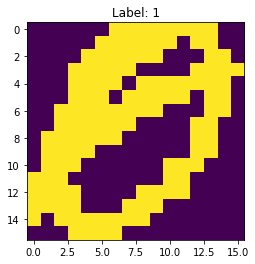

In [6]:
#vizualizácia bez použitia dodatočného filtru
plt.title(f"Label: {target[0]}")
plt.imshow(img_1)

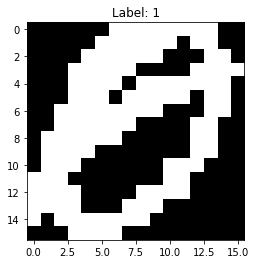

In [7]:
#vizualizácia s použitím čiernobieleho filtra "gray"
plt.title(f"Label: {target[0]}")
plt.imshow(img_1, cmap="gray")

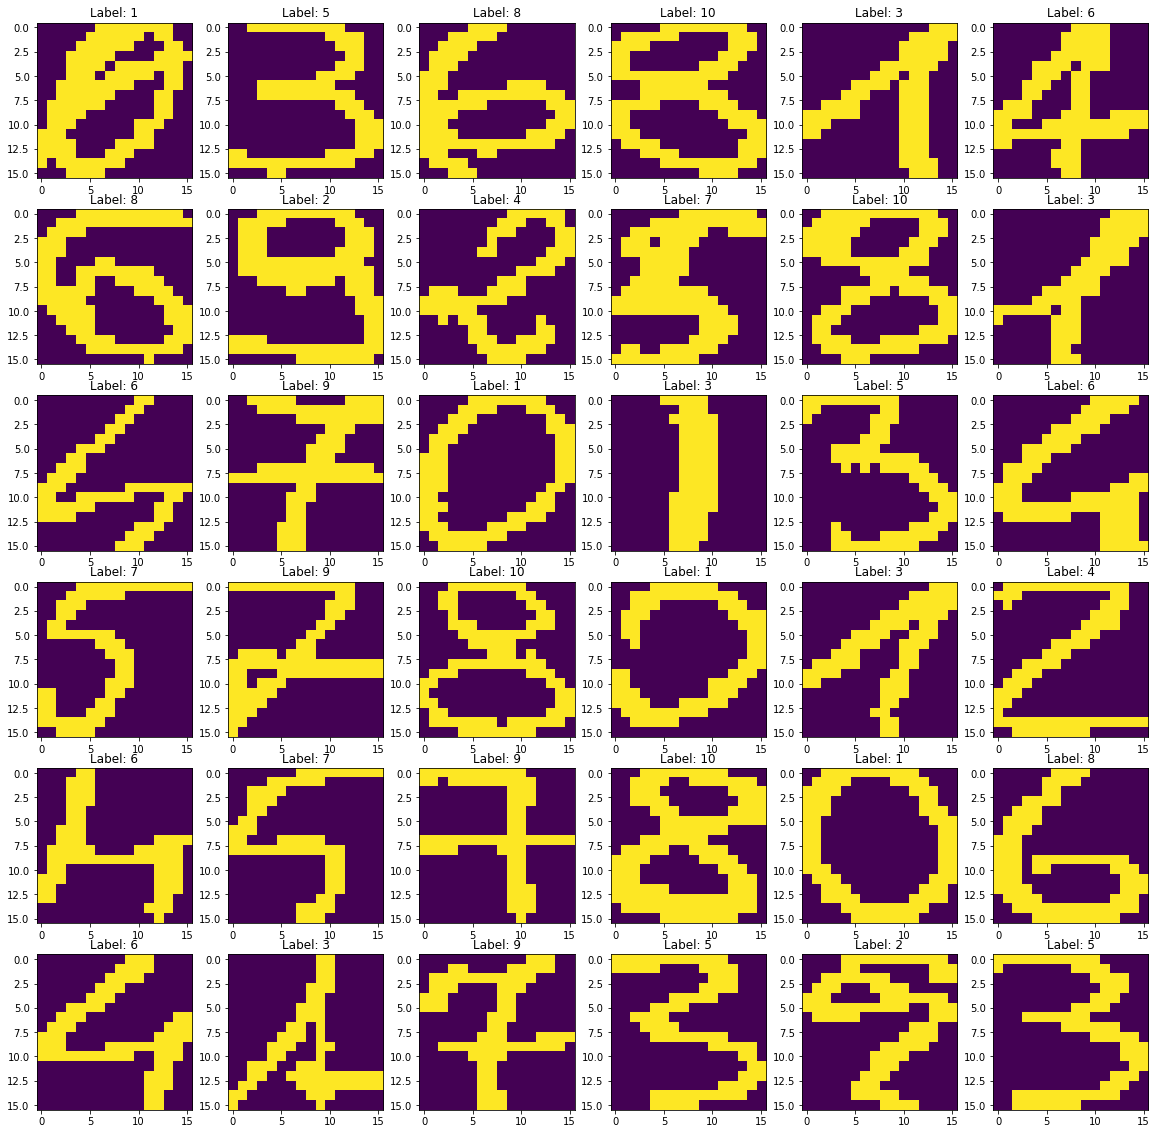

In [8]:
#vizualizácia v mriežke bez použitia dodatočného filtru
f, axarr = plt.subplots(6, 6, figsize=(20,20))
counter = 0

for i in range(0, 6):
    for j in range(0, 6):
        axarr[i, j].set_title(f"Label: {target[counter]}")
        axarr[i, j].imshow(data[counter].reshape(16, 16))
        counter += 40

---
#### <span style="color: blue;">Vizualizácia vzoriek dát (Class: 1):</span>

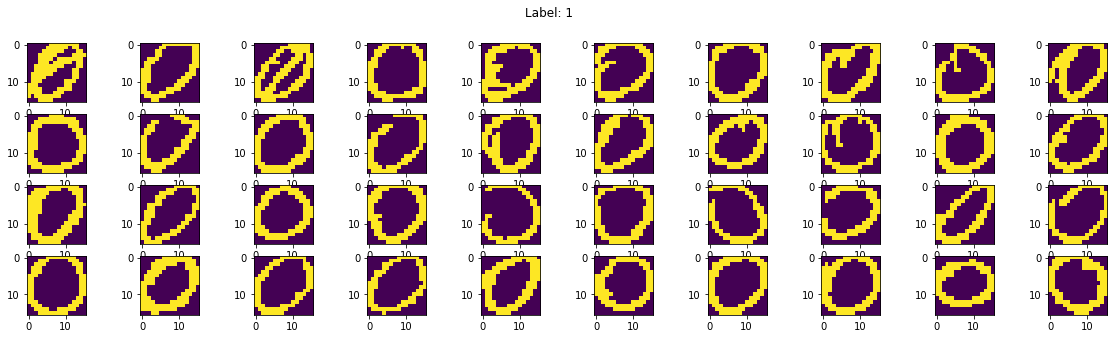

In [9]:
#vizualizácia bez použitia dodatočného filtru
f, axarr = plt.subplots(4, 10, figsize=(20,5))   
f.suptitle(f"Label: {1}")
counter = 0

for i in range(0, 4):
    for j in range(0, 10):
        while(1):
            if(target[counter] == 1):
                axarr[i, j].imshow(data[counter].reshape(16, 16))
                counter += 1
                break
            counter += 1

---
#### <span style="color: blue;">Vizualizácia vzoriek dát (Class: 1):</span>

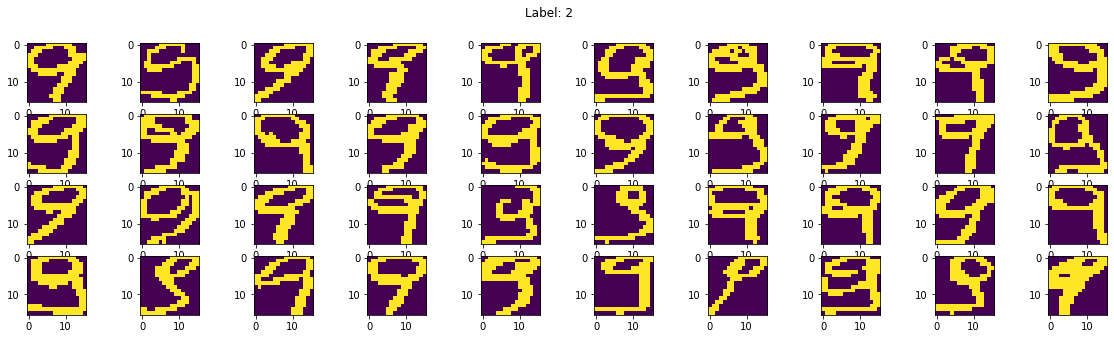

In [10]:
#vizualizácia bez použitia dodatočného filtru
f, axarr = plt.subplots(4, 10, figsize=(20,5))   
f.suptitle(f"Label: {2}")
counter = 0

for i in range(0, 4):
    for j in range(0, 10):
        while(1):
            if(target[counter] == 2):
                axarr[i, j].imshow(data[counter].reshape(16, 16))
                counter += 1
                break
            counter += 1

---
#### <span style="color: blue;">Vizualizácia vzoriek dát (Class: 3):</span>

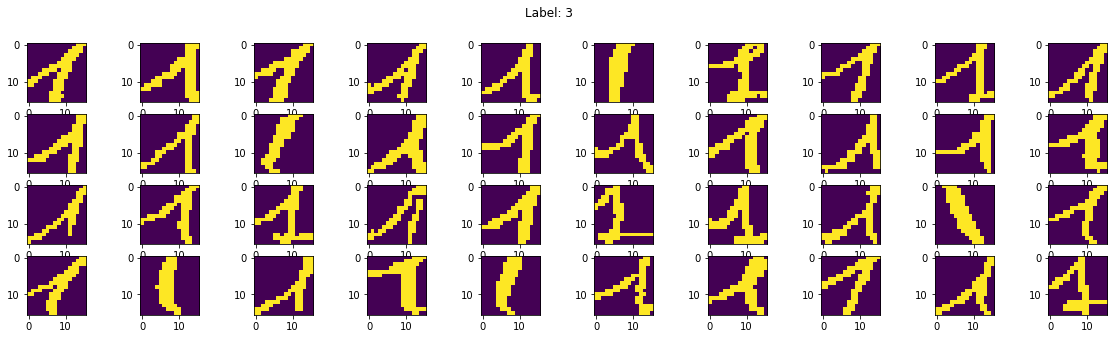

In [11]:
#vizualizácia bez použitia dodatočného filtru
f, axarr = plt.subplots(4, 10, figsize=(20,5))   
f.suptitle(f"Label: {3}")
counter = 0

for i in range(0, 4):
    for j in range(0, 10):
        while(1):
            if(target[counter] == 3):
                axarr[i, j].imshow(data[counter].reshape(16, 16))
                counter += 1
                break
            counter += 1

---
#### <span style="color: blue;">Vizualizácia vzoriek dát (Class: 4):</span>

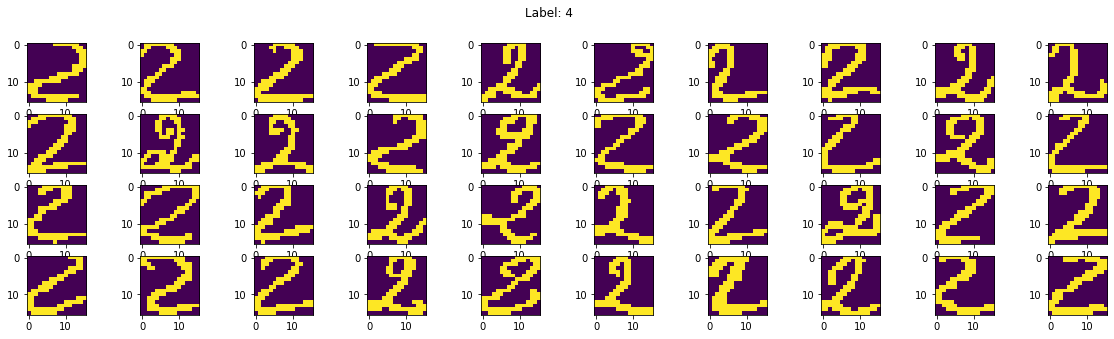

In [12]:
#vizualizácia bez použitia dodatočného filtru
f, axarr = plt.subplots(4, 10, figsize=(20,5))   
f.suptitle(f"Label: {4}")
counter = 0

for i in range(0, 4):
    for j in range(0, 10):
        while(1):
            if(target[counter] == 4):
                axarr[i, j].imshow(data[counter].reshape(16, 16))
                counter += 1
                break
            counter += 1

---
#### <span style="color: blue;">Vizualizácia vzoriek dát (Class: 5):</span>

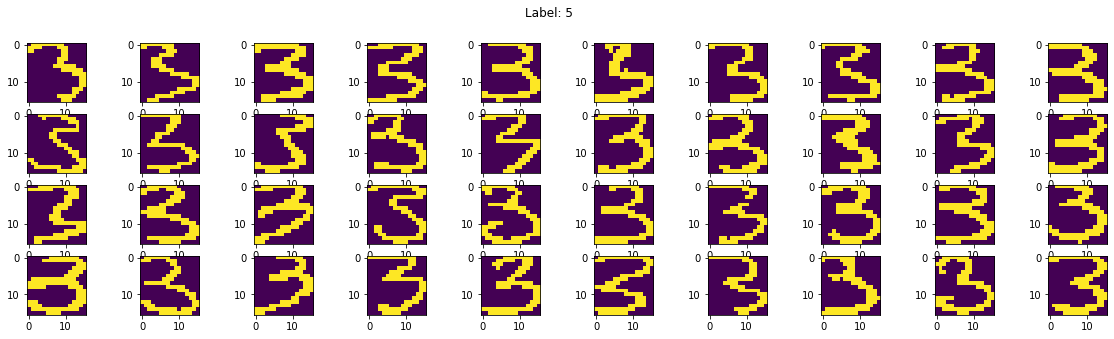

In [13]:
#vizualizácia bez použitia dodatočného filtru
f, axarr = plt.subplots(4, 10, figsize=(20,5))   
f.suptitle(f"Label: {5}")
counter = 0

for i in range(0, 4):
    for j in range(0, 10):
        while(1):
            if(target[counter] == 5):
                axarr[i, j].imshow(data[counter].reshape(16, 16))
                counter += 1
                break
            counter += 1

---
#### <span style="color: blue;">Vizualizácia vzoriek dát (Class: 6):</span>

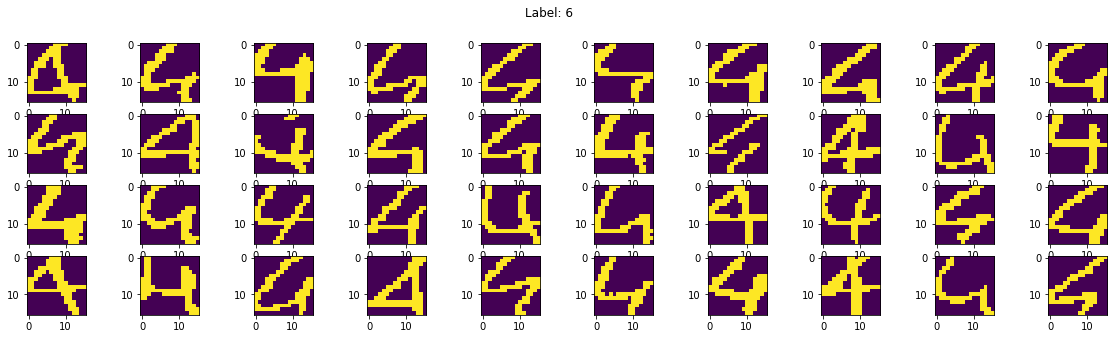

In [14]:
#vizualizácia bez použitia dodatočného filtru
f, axarr = plt.subplots(4, 10, figsize=(20,5))   
f.suptitle(f"Label: {6}")
counter = 0

for i in range(0, 4):
    for j in range(0, 10):
        while(1):
            if(target[counter] == 6):
                axarr[i, j].imshow(data[counter].reshape(16, 16))
                counter += 1
                break
            counter += 1

---
#### <span style="color: blue;">Vizualizácia vzoriek dát (Class: 7):</span>

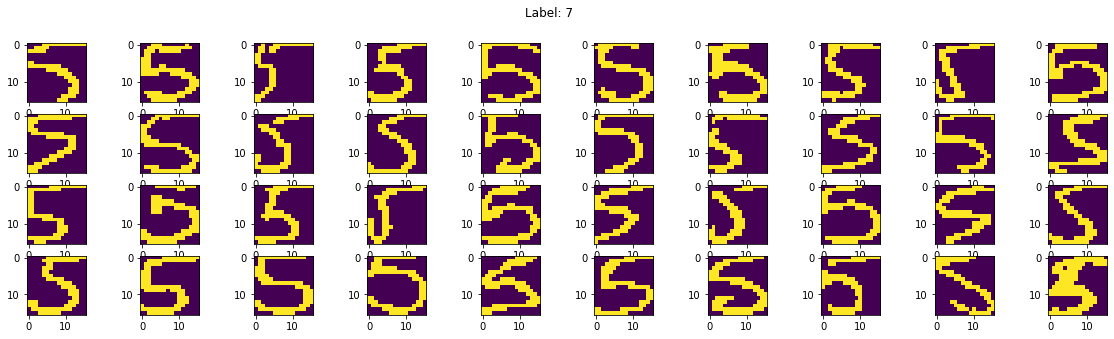

In [15]:
#vizualizácia bez použitia dodatočného filtru
f, axarr = plt.subplots(4, 10, figsize=(20,5))   
f.suptitle(f"Label: {7}")
counter = 0

for i in range(0, 4):
    for j in range(0, 10):
        while(1):
            if(target[counter] == 7):
                axarr[i, j].imshow(data[counter].reshape(16, 16))
                counter += 1
                break
            counter += 1

---
#### <span style="color: blue;">Vizualizácia vzoriek dát (Class: 8):</span>

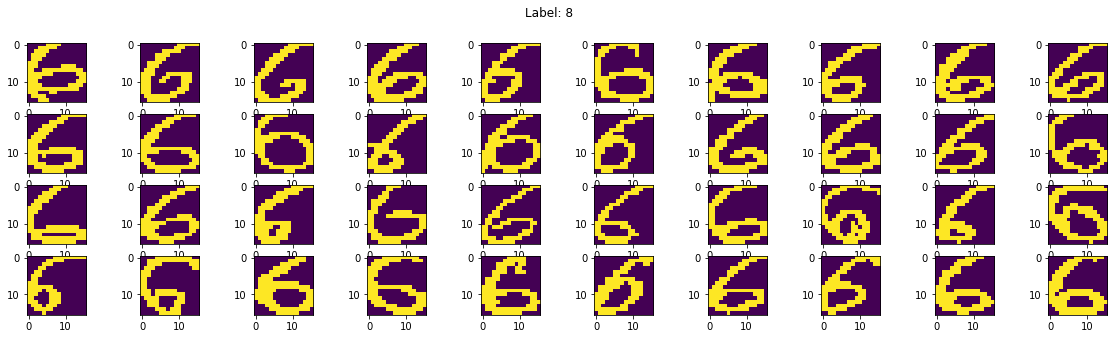

In [16]:
#vizualizácia bez použitia dodatočného filtru
f, axarr = plt.subplots(4, 10, figsize=(20,5))   
f.suptitle(f"Label: {8}")
counter = 0

for i in range(0, 4):
    for j in range(0, 10):
        while(1):
            if(target[counter] == 8):
                axarr[i, j].imshow(data[counter].reshape(16, 16))
                counter += 1
                break
            counter += 1

---
#### <span style="color: blue;">Vizualizácia vzoriek dát (Class: 9):</span>

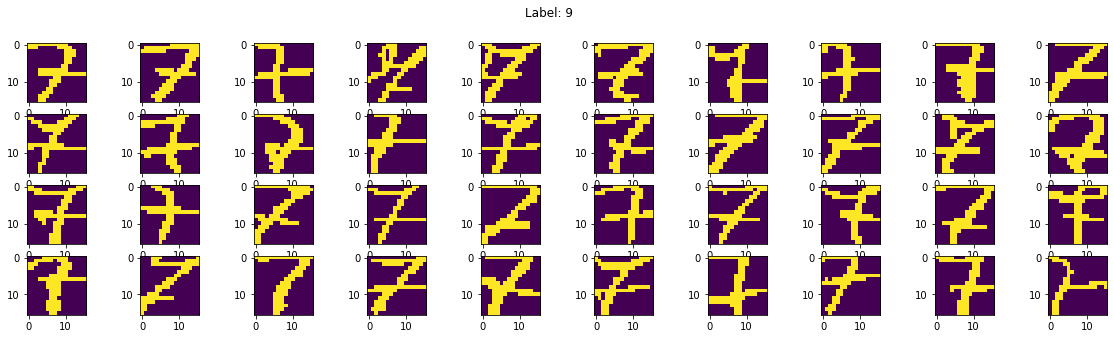

In [17]:
#vizualizácia bez použitia dodatočného filtru
f, axarr = plt.subplots(4, 10, figsize=(20,5))   
f.suptitle(f"Label: {9}")
counter = 0

for i in range(0, 4):
    for j in range(0, 10):
        while(1):
            if(target[counter] == 9):
                axarr[i, j].imshow(data[counter].reshape(16, 16))
                counter += 1
                break
            counter += 1

---
#### <span style="color: blue;">Vizualizácia vzoriek dát (Class: 10):</span>

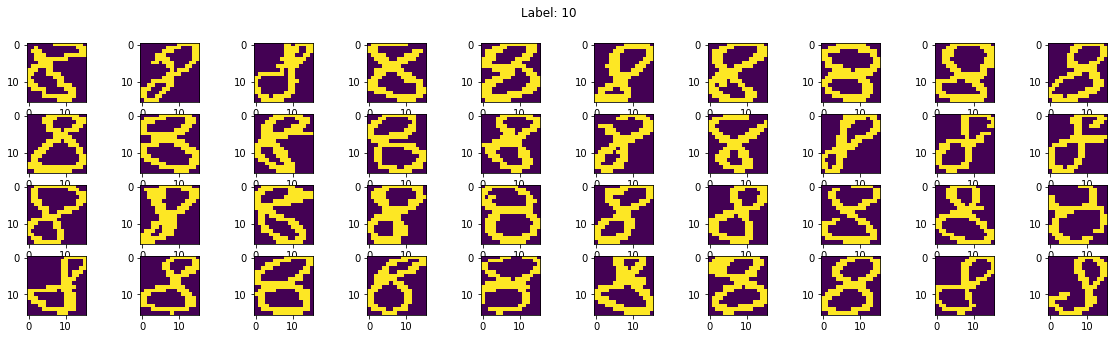

In [18]:
#vizualizácia bez použitia dodatočného filtru
f, axarr = plt.subplots(4, 10, figsize=(20,5))   
f.suptitle(f"Label: {10}")
counter = 0

for i in range(0, 4):
    for j in range(0, 10):
        while(1):
            if(target[counter] == 10):
                axarr[i, j].imshow(data[counter].reshape(16, 16))
                counter += 1
                break
            counter += 1

---
## Úprava datasetu:
Pri vizualizácie vzoriek dát sme dospeli k záveru, že označenie ich príslušnosti k daným čísliaciam nie je logicky správne.
<br>Preto sme dataset modifikovali, aby ich označenie bolo správne a priamo korešpondovalo s tým , akú číslicu vzorka reprezentuje. 

In [19]:
#úprava popisu dátových vzoriek ("Class") 
semeion_df = semeion_df.replace({"Class":{1:0, 2:9, 3:1, 4:2, 5:3, 6:4, 7:5, 8:6, 9:7, 10:8}})

---
## Vizualizácia vzoriek dát (číslic) upraveného datasetu:

In [20]:
#inicializácia matice z DataFrame-u
data = np.array(semeion_df)

#uloženie informácie o príslušnosti vzorky k číslu 0 až 9 do samostatnej premennej
target = data[:, -1]
#vymzanie informácie o príslušnosti vzorky k číslu 0 až 9 z pôvodnej premennej
data = np.delete(data, -1, 1)

#uloženie a preformátovanie dát reprezentujúcich prvú číslicu do samostatnej premennej
img_1 = data[0].reshape(16, 16)

In [21]:
semeion_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V248,V249,V250,V251,V252,V253,V254,V255,V256,Class
0,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,9
1589,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,0,0,0,9
1590,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,9
1591,0,0,0,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,9


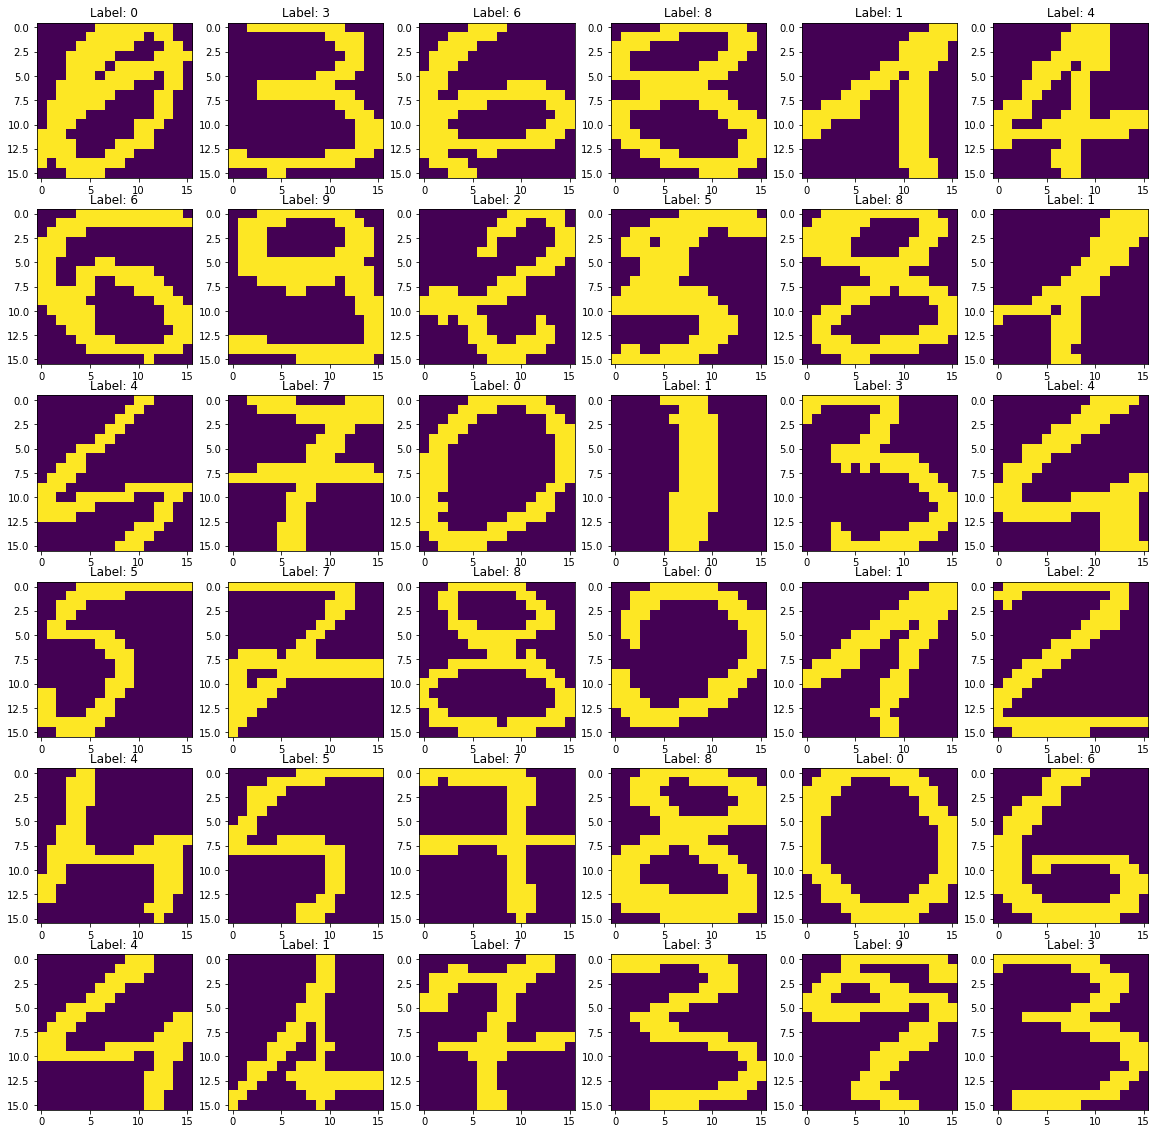

In [22]:
#vizualizácia v mriežke bez použitia dodatočného filtru
f, axarr = plt.subplots(6, 6, figsize=(20,20))
counter = 0

for i in range(0, 6):
    for j in range(0, 6):
        axarr[i, j].set_title(f"Label: {target[counter]}")
        axarr[i, j].imshow(data[counter].reshape(16, 16))
        counter += 40

---
## Rozbor datasetu:
Pri datasetoch určených na použitie pri strojovom učení je dôležitá ich vhodná robustnosť a škálovanie, ktoré dokážu pri vhodnej optimalizácii daného systému (neurónová sieť...) maximalizovať úspešnosť klasifikácie a minimalizovať trénovaci čas.
<br>Dataset Semeion vo svojej jedinnej sade obsahuje relatívne rovnomerný počet vzoriek.

Text(0.5, 0.98, 'Početnosť vzoriek číslic v datasete')

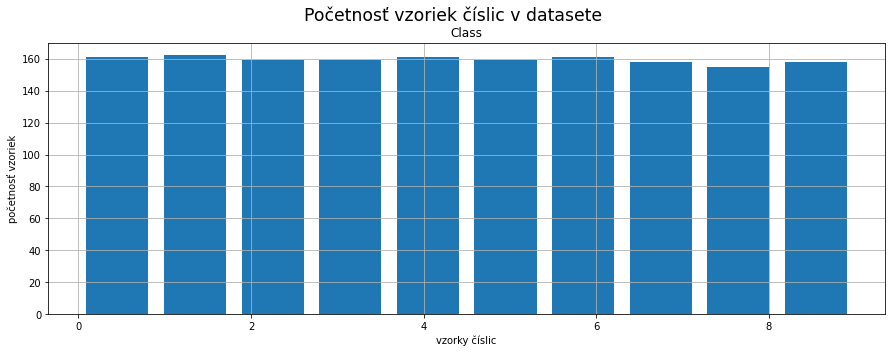

In [23]:
#zobrazenie histogramu zo zvolených údajov (0-tý stĺpec)
semeion_df.hist(column="Class", figsize=(15, 5), rwidth=0.8)
#nastavenie pomenovania x-ovej osi grafu
plt.xlabel("vzorky číslic")
#nastavenie pomenovania y-ovej osi grafu
plt.ylabel("početnosť vzoriek")
#nastavenie názvu grafu
plt.suptitle("Početnosť vzoriek číslic v datasete", ha="center", fontsize="xx-large")

In [24]:
print("Početnosť vzoriek číslic v datasete:")
sum_of_count = 0
for i in range(0,10):
    count = semeion_df[semeion_df.Class==i].shape[0]
    sum_of_count += count
    print(f" - počet vzoriek čísla {i}: {count}")
avrg = sum_of_count/(i+1)
print(f"\nPriemerný počet vzoriek: {avrg}")

Početnosť vzoriek číslic v datasete:
 - počet vzoriek čísla 0: 161
 - počet vzoriek čísla 1: 162
 - počet vzoriek čísla 2: 159
 - počet vzoriek čísla 3: 159
 - počet vzoriek čísla 4: 161
 - počet vzoriek čísla 5: 159
 - počet vzoriek čísla 6: 161
 - počet vzoriek čísla 7: 158
 - počet vzoriek čísla 8: 155
 - počet vzoriek čísla 9: 158

Priemerný počet vzoriek: 159.3


---
## Zdroje:

Semeion Research Center of Sciences of Communication, via Sersale 117, 00128 Rome, Italy
Tattile Via Gaetano Donizetti, 1-3-5,25030 Mairano (Brescia), Italy.